### Objective
To establish the likeleyhood of surviving the Titanic incedent or not surviving the Titanic incedent.

Create a Decision Tree that can predict the survival of passengers on the Titanic. Make sure not to impose any restrictions on the depth of the tree.

### Import needed Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.ndimage import histogram
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
import seaborn as sns
from subprocess import call

### Import the data set

In [2]:
# Import data and display columns headings (axis = 1)

titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Clean data up 

In [3]:
# Define current data values, objects and null versus non-null
 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Looking at the data. (891)



Passenger ID is fine. ( Leave out due to relevance )

Survived is fine. ( Dependant variable )

Pclass is fine 

Name is object so leave out or convert. ( Leave out )

Sex is object so leave out or convert. ( Convert )

Age is missing values so substitute with mean value for age. 

Sibsp is fine 

Parch is fine 

Ticket is object, so leave out or convert ( Leave out )

Fare is fine

Cabin is object and missing values so leave out or convert ( Leave out )

Embarked is missing values and is object so leave out or convert ( Convert )


In [4]:
# Drop, name, fare, cabin, parch, ticket on axis 1

titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
titanic_df.drop("Fare", axis=1, inplace=True)
titanic_df.drop("Parch", axis=1, inplace=True)
titanic_df.drop("Cabin", axis=1, inplace=True)

In [5]:
# Fill in the average age for the ages that are missing 
# Average Age for missing values (29)

df2 = titanic_df["Age"].mean()
titanic_df.fillna(df2, inplace=True)

print(f"The average age of the Titanic passanger was {int(df2)} years old.")

The average age of the Titanic passanger was 29 years old.


### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [6]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Embarked,Sex_female,Sex_male
0,1,0,3,22.0,1,S,False,True
1,2,1,1,38.0,1,C,True,False
2,3,1,3,26.0,0,S,True,False
3,4,1,1,35.0,1,S,True,False
4,5,0,3,35.0,0,S,False,True


Now, we do the same to the "Embarked" column.

In [8]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Sex_female,Sex_male,Embarked_29.69911764705882,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,False,True,False,False,False,True
1,2,1,1,38.0,1,True,False,False,True,False,False
2,3,1,3,26.0,0,True,False,False,False,False,True
3,4,1,1,35.0,1,True,False,False,False,False,True
4,5,0,3,35.0,0,False,True,False,False,False,True


In [9]:
# Define new data values, objects and null versus non-null
 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PassengerId                 891 non-null    int64  
 1   Survived                    891 non-null    int64  
 2   Pclass                      891 non-null    int64  
 3   Age                         891 non-null    float64
 4   SibSp                       891 non-null    int64  
 5   Sex_female                  891 non-null    bool   
 6   Sex_male                    891 non-null    bool   
 7   Embarked_29.69911764705882  891 non-null    bool   
 8   Embarked_C                  891 non-null    bool   
 9   Embarked_Q                  891 non-null    bool   
 10  Embarked_S                  891 non-null    bool   
dtypes: bool(6), float64(1), int64(4)
memory usage: 40.2 KB


### Select relevant variables from the data and split the data into a training, development, and test set.

#### Independant Variables

In [10]:
# Independant Variables

X = titanic_df[["Pclass","Age","Sex_male","Sex_female","Embarked_S","Embarked_C","Embarked_Q"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   Sex_male    891 non-null    bool   
 3   Sex_female  891 non-null    bool   
 4   Embarked_S  891 non-null    bool   
 5   Embarked_C  891 non-null    bool   
 6   Embarked_Q  891 non-null    bool   
dtypes: bool(5), float64(1), int64(1)
memory usage: 18.4 KB


#### Dependant Variable

In [11]:
# Dependant Variable

y = titanic_df["Survived"]
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


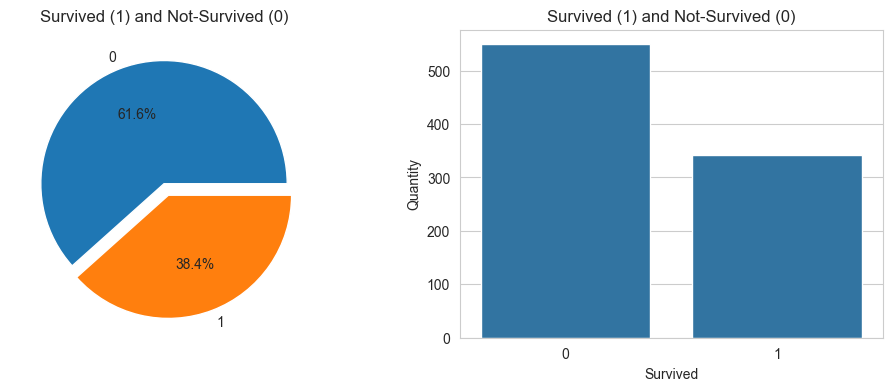

In [12]:
# What the graphic representation of the Survived looks like  

f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
titanic_df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False) 
ax[0].set_title('Survived (1) and Not-Survived (0)') 
ax[0].set_ylabel('') 
sns.countplot(x='Survived', data=titanic_df, ax=ax[1])
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survived (1) and Not-Survived (0)') 
plt.show()

#### Split into Training Development and test set. 
Assign a random state of 42

Assign a 20 % Test and 80 % Training set

In [13]:
# Random state.

r = 42 # Random state set at 42

# X TrainFull, Y TrainFull.

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=r) # 80% training and 20% test

#### Split into Training Development and test set. 
Assign a random state

Assign a 20 % Test and 80 % Training set

In [14]:
# X Development and Y Development.

X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=r) # 80% training and 20% development

In [15]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()


### Train a decision tree and make a plot of it.

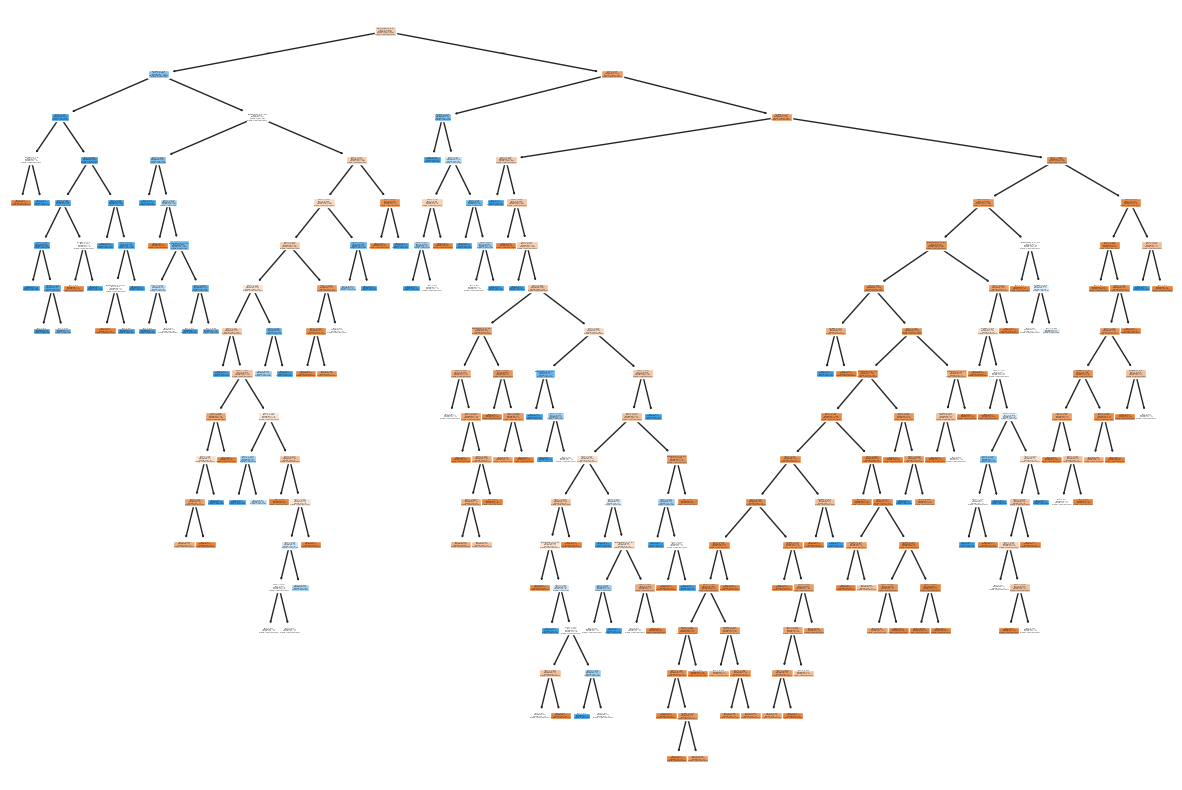

In [16]:
# Make a plot of the decision tree

plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=list(X.columns), class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

### Compute your model’s accuracy on the development set.

In [17]:
# Compute your model’s accuracy on the development set.

score = model.score(X_dev, y_dev)
print(f"Accuracy on the development set: {model.score(X_dev, y_dev)}")

Accuracy on the development set: 0.8111888111888111


### Try building your model with different values of the max_depth [2-10]. At each step, create a plot of your tree and store the accuracies on both the training and development data.

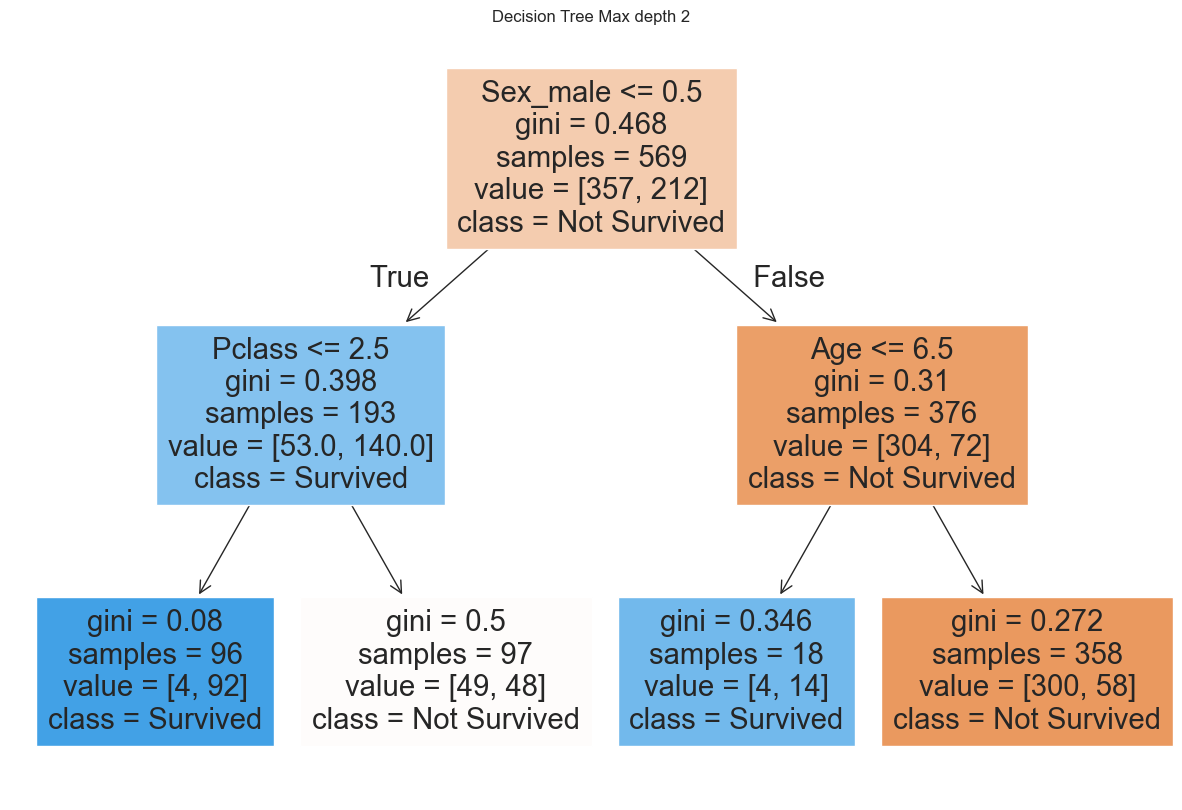

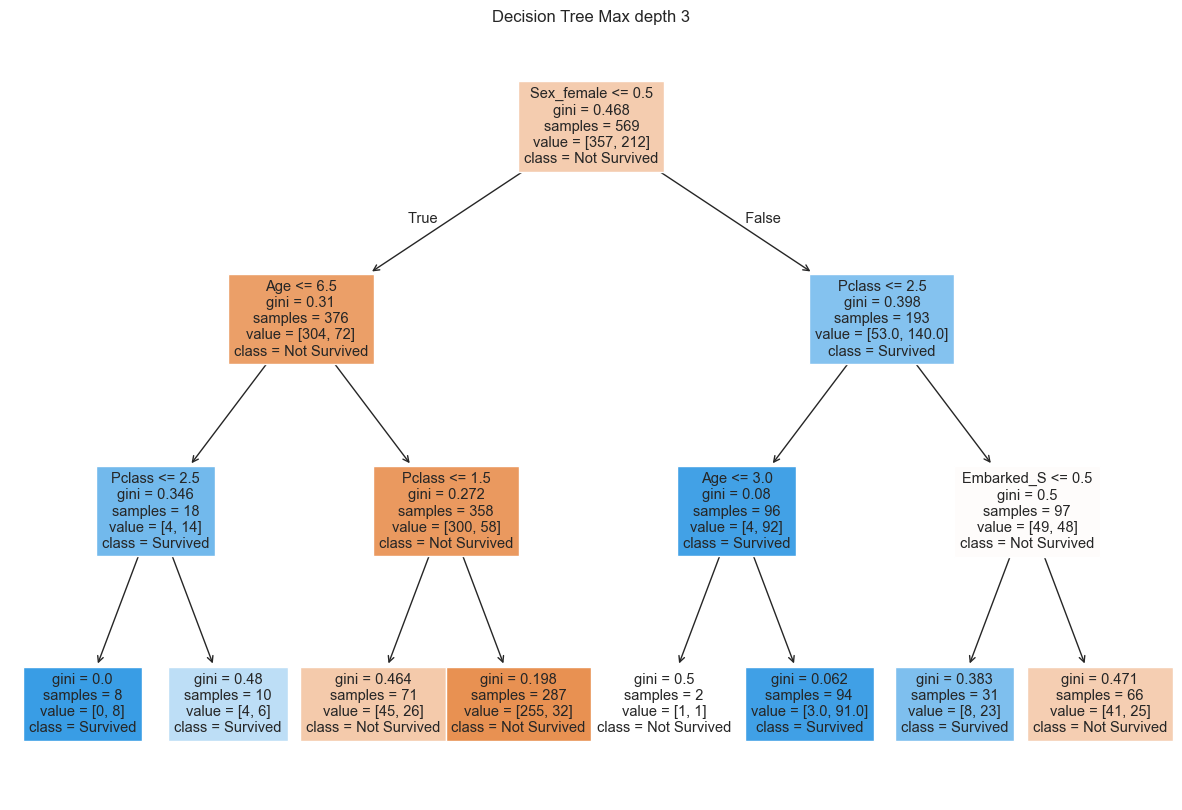

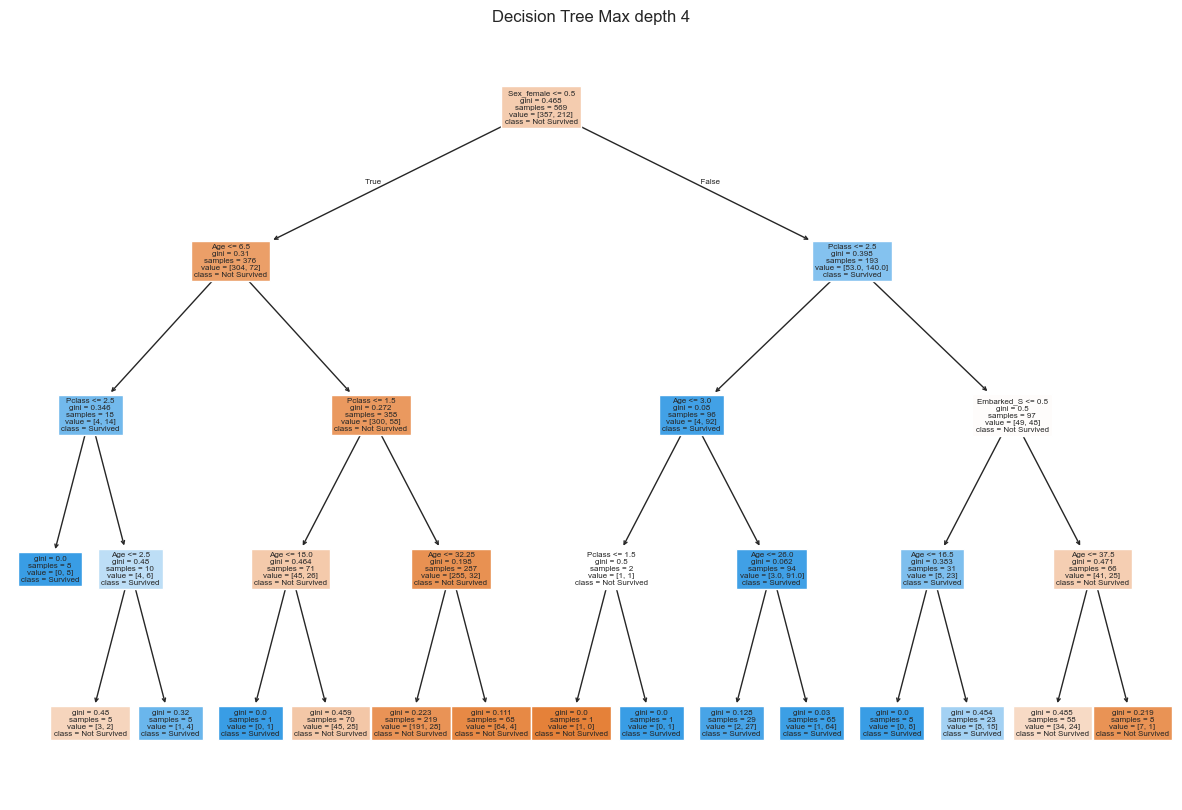

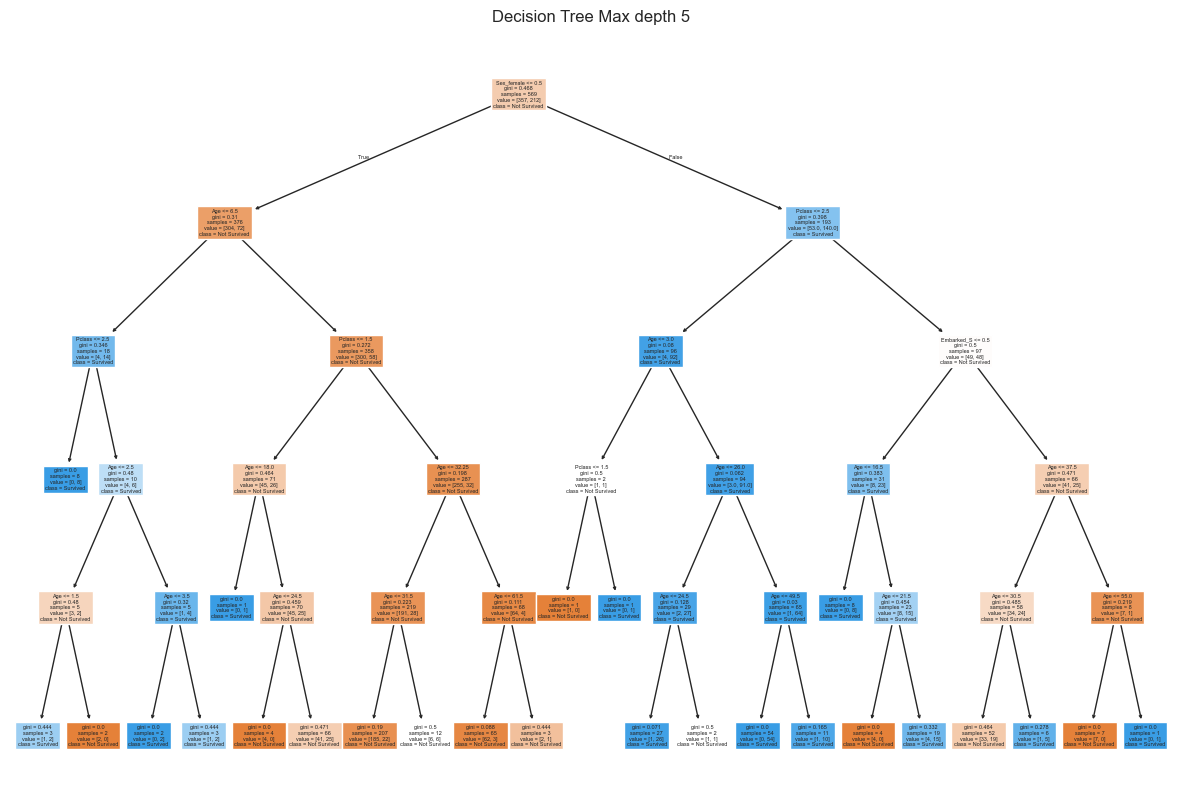

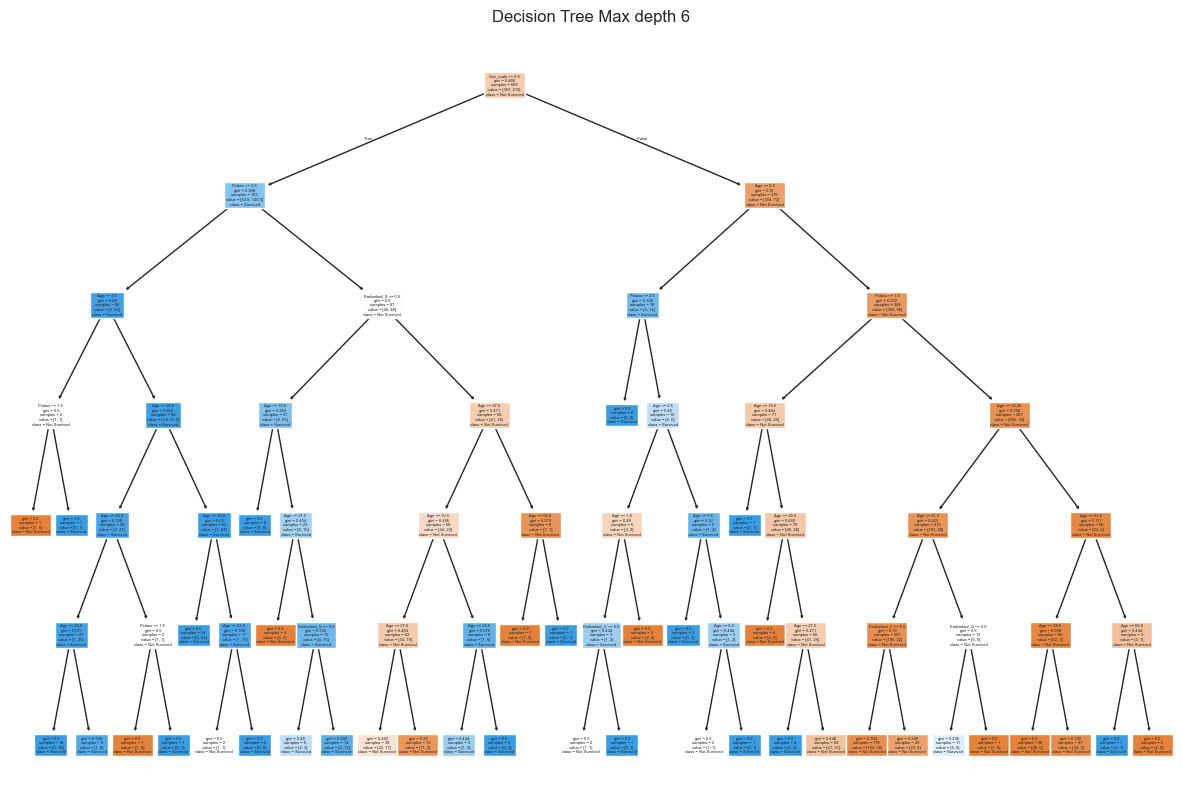

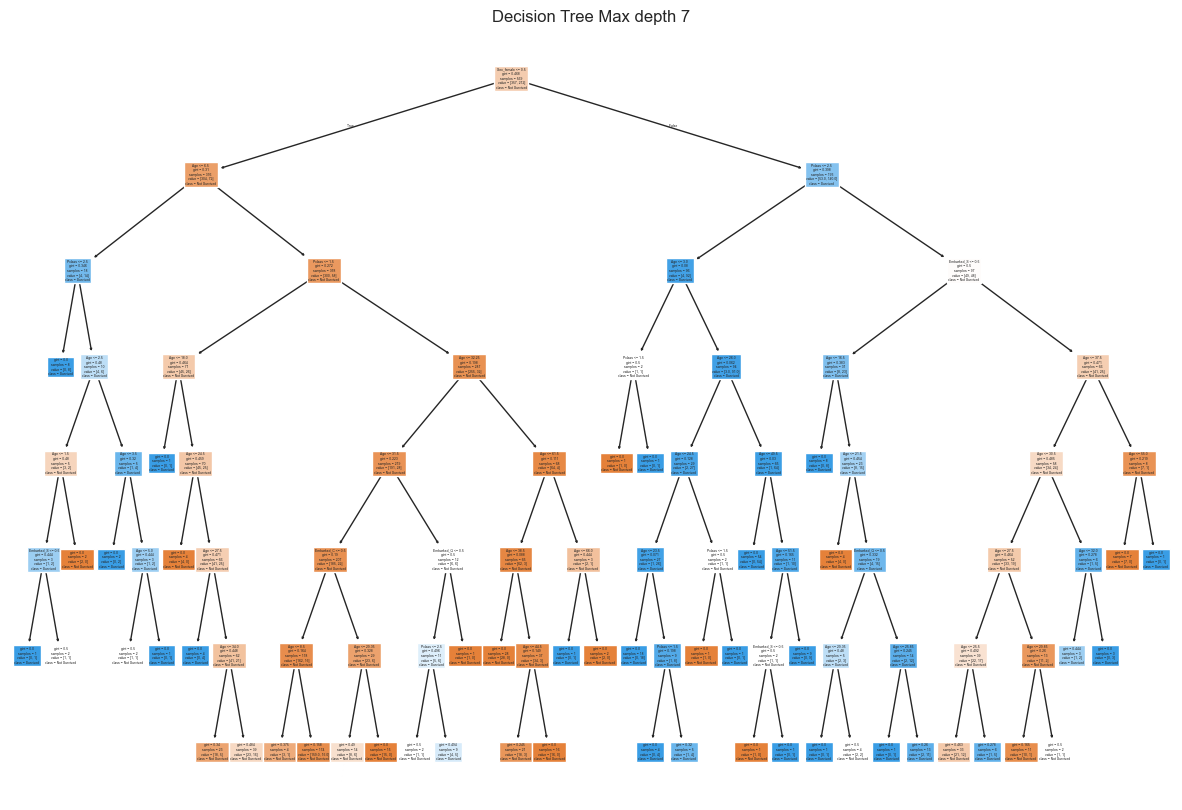

In [ ]:
# Develop for loop to define 2 - 11 iterations of max-depths outcomes. 

max_depths = list(range(2, 11))
train_accuracy = []
dev_accuracy = []

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    plt.figure(figsize=(15, 10))
    plot_tree(model, feature_names=list(X.columns), class_names=['Not Survived', 'Survived'], filled=True)
    plt.title(f"Decision Tree Max depth {depth}")
    plt.show()

    train_score = model.score(X_train, y_train)
    dev_score = model.score(X_dev, y_dev)

    train_accuracy.append(train_score)
    dev_accuracy.append(dev_score)

### Plot a line of your training accuracies and another of your development accuracies in the same graph. Write down what shape the lines have and what this shape means.

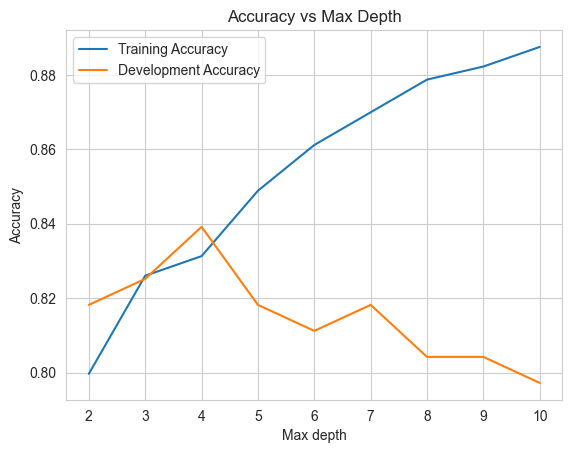

In [157]:
# Accuracy versus depth training and development plot.

plt.plot(max_depths, train_accuracy, label='Training Accuracy')
plt.plot(max_depths, dev_accuracy, label='Development Accuracy')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Max Depth")
plt.legend()
plt.show()


#### The development accuracy increases up until depth 4 where it starts decreasing. 
#### The training accuracy keeps on steadily increasing.
#### After depth 4 the training accuracy and development accuracy diverge making the model less accurate after depth 4

In [176]:
# Best depth for model.

best_depth = max_depths[np.argmax(dev_accuracy)]
print(f"Best depth for model is: {best_depth}")


Best depth for model is: 4


### Report the accuracy of your final model on the test data.

In [184]:
# Making predictions
model.fit(X_train, y_train)
model.score(X_test, y_test)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)
print('The best depth for the model', best_depth)

The training accuracy is 0.9121265377855887
The test accuracy is 0.7821229050279329
The best depth for the model 4


We have our Decision Tree. It achieves an accuracy of 83.13% across the dataset.
At a Max-Depth which is set at 4

In [194]:
# decision_tree = tree.DecisionTreeClassifier at max_depth of 4

decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

decision_tree.fit(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print('The model accuracy is', acc_decision_tree)


The model accuracy is 83.13
